In [11]:
!pip3 install torch torchvision torchaudio
import torch
from torchvision import transforms, datasets

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [12]:
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

x = torch.zeros([2, 5])
y = torch.rand([2, 5])

# Changing the shape of the Tensor
y = y.view([1, 10])

In [13]:
# Pass in transformers to the data here
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

0.2%

102.8%


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




78.9%

112.7%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [14]:
# Using batches of data is more efficient, especially when the dataset
# is huge. Also, passing in batches lets the machine learn more generalizations
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [15]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [16]:
x, y = data[0][0], data[1][0]
print(y)

tensor(8)


In [18]:
!pip3 install matplotlib
import matplotlib.pyplot as plt

  Using cached matplotlib-3.5.0-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached kiwisolver-1.3.2-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)
     |████████████████████████████████| 880 kB 2.0 MB/s eta 0:00:01
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached tomli-1.2.2-py3-none-any.whl (12 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


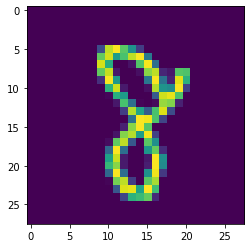

In [19]:
# PyTorch has a different shaping standard. There's a 1x28x28 shaping
# style for an image.

plt.imshow(x.view([28, 28]))
plt.show()

In [20]:
# Optimizer tries to decrease loss and it doesn't have any idea
# how much better we could get. You want to balance the dataset.

In [21]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
  xs, ys = data
  
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [22]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # 3 layers of 64 neurons for our hidden layer
    self.fc1 = nn.Linear(784, 64) # Activation function runs on the output side
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    # Feed forward neural net
    # The activation function is whether or not the neuron is firing
    # Don't wanna run relu on the output layer. Log softmax is a good choice.

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    # Which dimension to apply softmax on? Output is flat, so dim=1
    # It is similar to axes.
    return F.log_softmax(x, dim=1)

net = Net()

In [25]:
X = torch.rand((28, 28))
# Why is the -1 here? Says that the input is of unknown shape
X = X.view(-1, 28*28)
output = net(X)
print(output)

tensor([[-2.3616, -2.2694, -2.3541, -2.1959, -2.2857, -2.2462, -2.4061, -2.3712,
         -2.3307, -2.2269]], grad_fn=<LogSoftmaxBackward0>)


In [26]:
# Loss and Optimizer. We want to minimize loss obviously. 
# Note - You can tell your neural network which weights to adjust
import torch.optim as optim

# You don't want your learning rate to be too large as it won't
# catch the nuances of the data. Also, it shouldn't be too small
# as the solution will only be a local maxima/minima. 

# On complex problems, we use a decaying learning rate.
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3 # 3 full passes through data

# Zero gradient is if you wanna batch the data up
# 2 main ways of calculating loss: one hot vector ([0, 1, 0, ...]) 
# and nll (for scalar data)
for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)


tensor(0.1545, grad_fn=<NllLossBackward0>)
tensor(0.3452, grad_fn=<NllLossBackward0>)
tensor(0.0661, grad_fn=<NllLossBackward0>)


In [27]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      
      total += 1

print("Accuracy: {}".format(round(correct/total, 3)))

Accuracy: 0.98


In [28]:
import matplotlib.pyplot as plt


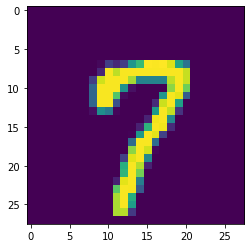

tensor(7)


In [29]:
plt.imshow(X[1].view(28, 28))
plt.show()
print(torch.argmax(net(X[1].view(-1, 28*28))[0]))

# CNN (Convo Neural Net)

In [32]:
# Traditionally, CNNs were used for image stuff. However, in recent
# year, they have even beat RNNs (Reccurent) in sequential problems.
# Images are arrays of pixels. Each convolution (or kernel) takes a
# subset of these pixels and look for features within them.

# Condense the image and then pool them (maxpooling). 

In [38]:
!pip3 install numpy opencv-python tqdm

import os
import cv2
import numpy as np
from tqdm import tqdm # progress bar        

     |████████████████████████████████| 76 kB 5.3 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [47]:
REBUILD_DATA = False

class DogsVSCats:
  # Images have varying size and shape, but we want them
  # to be uniform.
  IMG_SIZE = 50
  CATS = "catsVSdogs/PetImages/Cat"
  DOGS = "catsVSdogs/PetImages/Dog"
  LABELS = {CATS: 0, DOGS: 1}

  training_data = []
  # MAKE SURE THE DATASET IS BALANCED. If there are 10000 pictures of cats and 100 of dogs, you're not
  # gonna make a decent neural network ovviamente.
  catcount = 0
  dogcount = 0
 
    # Everything is a feature to the machine, even the colors of
    # an image. So think about whether color makes a difference
    # to your neural net.
  def make_training_data(self):
    for label in self.LABELS:
      for f in tqdm(os.listdir(label)):
        try:
            path = os.path.join(label, f)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

            # One hot vectors allow a better loss metric. Once again,
            # an example of a one hot vector would be [1, 0] if it's
            # a cat and [0, 1] if it's a dog. The np.eye function
            # helps doing that with the diagonals.
            self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

            if label == self.CATS:
                self.catcount += 1

            elif label == self.DOGS:
                self.dogcount += 1
        except Exception as e:
            pass
        
    np.random.shuffle(self.training_data)
    np.save("training_data.npy", self.training_data)
    print("Cats: {}".format(self.catcount))
    print("Dogs: {}".format(self.dogcount))
    

if REBUILD_DATA:
    dogvcats = DogsVSCats()
    dogvcats.make_training_data()
        

In [49]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [52]:
# This is the power of appending the np array of the image and its
# associated one hot vector. It'll show what each image is as
# numbers; easy for the neural net to digest.
print(training_data[1])

[array([[143, 219, 215, ...,  46,  12,  28],
        [138, 212, 211, ...,  65,  15,  36],
        [133, 202, 196, ...,  45,  27,  70],
        ...,
        [230, 229, 226, ..., 100, 155, 128],
        [227, 224, 226, ...,  65, 153, 173],
        [227, 227, 226, ...,  67, 136, 183]], dtype=uint8) array([0., 1.])]


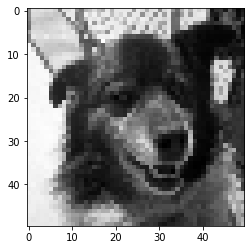

In [55]:
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [77]:
# Building a neural network to classify images

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 x 5 kernel
        # Images are 2D so that's all we need. If you want
        # more dimensions, you can code them yourself as well!
        
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)      
        
        # Now we have to flatten this 2D conv layer to 1D or 
        # "flatten" in TensorFlow terminology
        x = torch.randn(50, 50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)
        
        # The important part is figuring out what the input number
        # to the first linear layer is going to be.
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
        
    # We're gonna run the forward method through the three conv
    # layers in an attemp to see the result - to see what to
    # pass as input to the input fc1 layer
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        if not self._to_linear:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        
        return x
    
    def forward(self, x):
        # Gotta run convs or Flatten twice to know the number of
        # input neurons
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.softmax(x, dim=1)
        
        
net = Net()

In [73]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X / 255.0    # Scaling/Normalizing the image pixel data
# No need to reshape the y (label) values
y = torch.Tensor([i[1] for i in training_data])

# Seperating training/validation data
VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)


In [74]:
train_x = X[:-val_size]
train_y = y[:-val_size]

test_x = X[-val_size:]
test_y = y[-val_size:]

In [78]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
        batch_x = train_x[i:i + BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i + BATCH_SIZE]
        
        # gotta zero the gradients
        # no difference between optimizer.zero_grad and net.zero_grad
        # if you've passed all the network's parameters inside the optimizer.
        
        net.zero_grad()
        outputs = net(batch_x)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
print(loss)

100%|█████████████████████████████████████████| 225/225 [01:02<00:00,  3.58it/s]

tensor(0.2490, grad_fn=<MseLossBackward0>)


In [80]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_x))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_x[i].view(-1, 1, 50, 50))[0]
        predicted_class = torch.argmax(net_out)
        
        if predicted_class == real_class:
            correct += 1
        
        total += 1
        
print("Accuracy: {}".format(round(correct/total, 3)))


100%|██████████████████████████████████████| 2494/2494 [00:03<00:00, 688.47it/s]

Accuracy: 0.488
